<a href="https://colab.research.google.com/github/seungcheoll/algorithm/blob/main/ML3_ch5_3_%ED%8A%B8%EB%A6%AC%EC%9D%98_%EC%95%99%EC%83%81%EB%B8%94_230520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **05-3 트리의 앙상블**

"나무 말고 숲을 보라." (p. 264)

### 1) 정형데이터와 비정형데이터, 앙상블

#### a) 정형, 비정형 데이터

* 정형데이터(structured data)

    csv data,

    Excel이나 Database로 저장한 데이터

  - '사이킷런에서 제공하는 정형데이터 분석의 끝판왕 - **앙상블(ensemble)** 학습 알고리즘' (p. 265)
    -  random forest
    - extra tree
    - gradient boosting
    - histogram-based gradient boosting
    - ...

* 비정형데이터(unstrunctured data)

    text data, image data, sound data, ...

    - 비정형 데이터를 위한 학습 알고리즘은?
      - 분류, 회귀, 군집 알고리즘. ......
      - 7장 이후에 공부할 **인공 신경망(ANN, artificial neural network)**



#### b) 앙상블, 배깅

* 앙상블

  성능이 아주 뛰어난 분류 알고리즘이 하나 있다고 하자.

  한편 성능이 낮은 분류 알고리즘들이 여러 개 있다고 하자.

  성능이 낮은 알고리즘 여럿의 결과를 모아서 (다수결 방식으로) 예측한다면 아주 뛰어난 알고리즘 하나만 이용할 때보다 성능이 더 좋아지지 않을까?



>   **대중의 지혜** : 답을 찾기 어려운 사회적 이슈가 있다. 간단히 답을 찾을 수 없는 꽤 복잡한 문제라고 해보자.



> 전문지식을 가진 전문가 한 사람의 의견을 따를 것인가, 아니면 다수 일반 시민에게 물어서 얻은 결과를 따를 것인가?



> **앙상블(ensemble)**은 여러 알고리즘을 함께 이용해서 분류, 예측하는 방법이다.



* 배깅

  분류 문제를 위한 앙상블 학습을 예로 들어보자.

  여러 가지 다른 분류 알고리즘들을 이용해서 동일한 훈련데이터로 앙상블 분류 학습을 할 수 있다.

  한편, 하나의 알고리즘을 이용하되 훈련 데이터를 랜덤하게 바꾸어서 앙상블 학습하는 방법도 있겠다. 이때 훈련 데이터에서 중복을 허용하여 샘플링한 서로 다른 데이터에 하나의 알고리즘을 적용하는 방식을 **배깅(bagging, bootrsrap aggregating)**이라 부른다. 중복을 허용하지 않고 샘플링하는 방법은 pasting이라고 부른다.

  배깅 가운데 특별히 <u>훈련 데이터로부터 중복을 허용하여 무작위로 샘플링한 서로 다른 데이터에 대해 결정트리를 이용하는 앙상블 방법</u>을 **랜덤 포레스트**라고 부른다. 즉 random forest는 부트스트랩 샘플링 방법으로 얻은 다른 훈련데이터에 대해 트리 모델을 이용해서 분류하는 방법으로서 배깅의 일종이다. 물론 랜덤포레스트를 비롯한 배깅 방법들은 회귀에도 이용할 수 있다.

#### c) variance - bias tradeoff

분류, 회귀 문제에서 예측오류는 편향(bias)과 분산(variance) 둘로 나눌 수 있다.

훈련 데이터에 너무 잘 들어맞는 복잡한 모델을 만들면 데이터의 패턴을 잘 찾아내지만(편향이 작다) 데이터가 조금만 바뀌어도 예측이 달라진다. 즉 모델을 훈련 데이터 바깥으로 일반화하기 어려워지는 과대적합 문제가 생긴다(분산이 커진다).

반대로 너무 단순한 모델을 만들면 데이터가 바뀌어도 모델은 별로 바뀌지 않지만(분산이 작아진다) 데이터의 패턴을 제대로 찾아내지 못하게 된다(편향이 커진다). 이처럼 둘을 동시에 작게 만들 수 없다는 것이다.

> [한글 위키피디아](https://ko.wikipedia.org/wiki/%ED%8E%B8%ED%96%A5-%EB%B6%84%EC%82%B0_%ED%8A%B8%EB%A0%88%EC%9D%B4%EB%93%9C%EC%98%A4%ED%94%84)의 설명을 보자.

노드분할을 거듭하면 결정트리는 과대적합 모델을 만들기 쉽다. 즉 편향이 작아지는 대신 분산이 커지는 경향이 있다. 반면 노드 분할을 적게 하면 트리모델의 분산은 줄어들지만 편향이 커진다. 랜덤포레스트를 비롯한 앙상블 방법은 통상적으로 편향을 크게 만들지 않으면서 분산을 줄이는 방법으로 알려져있다(물론 그 댓가는 계산량이 많아진다는 점이다).

### 2) 랜덤포레스트

#### a) random forest란?

하나의 결정 트리가 아니라 여러 결정 트리로 이루어진 숲(기본값 = 결정 트리 100개)을 이용해서 target을 예측하는 대표적인 앙상블 학습 알고리즘.

    분류를 위한 random forest : `RandomForestClassifier`

    회귀를 위한 rarndom forest : `RandomForestRegressor`

#### b) bootstrap sampling

각 트리를 훈련할 때 입력 훈련 데이터 중에서 <u>랜덤하게 중복 추출</u>한 데이터를 이용(265-6쪽 설명 볼 것).

[B. Efron](https://en.wikipedia.org/wiki/Bradley_Efron)

#### c)  랜덤 포레스트의 두 가지 'random'



> * 각 트리의 훈련 샘플을 부트스트랩 방식으로 랜덤하게 선택한다(트리마다 학습 데이터가 달라진다).

> * 분류 알고리즘의 경우 각 트리의 feature 변수 중에서 몇 개를 랜덤하게 선택한다(트리마다 피처변수들이 달라진다).

#### d) random forest 와인 분류

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
wine.shape

(6497, 4)

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
train_input, test_input, train_target, test_target = \
train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


랜덤포레스트 분류 클래스 `RandomForestClassifier`는 사이킷런의 `ensemble` 모듈 안에 있다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

`RandomForestClassifier()`의 괄호 속에는 `DecisionTreeClassifier`에 나오는 파라미터들을 비롯해서 여러 파라미터가 들어갈 수 있는데([도움말](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) 참조) 그 중에서 `n_estimators`와 `max_features`가 특히 중요하다.

  * `n_estimators`는 랜덤포레스트에서 이용할 트리모델의 수(기본값은 100개)를 의미한다.

  * 또 `max_features`는 노드를 분할할 때 이용할 feature 변수의 수를 나타낸다(기본값은 전체 피처 수의 제곱근).

랜덤 포레스트는 전체 학습 데이터가 아니라 학습데이터로부터 부트스트랩 샘플링으로 얻은 데이터를 가지고 많은 트리를 만든다.

그리고 각 트리에서 노드를 분할할 때에는 `max_features`에서 지정한 수만큼의 피처변수만을 랜덤으로 선택해서 최적의 분할 기준을 찾아 노드를 나눈다.

즉 random forest에서는 각 나무를 만들 훈련 데이터 선택 때, 그리고 각 나무를 만들 피처 변수 선택 때 'random'이 작용한다.

<u>랜덤포레스 방법의 실행 시간이 오래 걸린다면 노드 분할 때마다 최적의 분할 기준을 찾아야하 는 바로 이 단계때문</u>이다.

먼저 기본 파라미터만으로 랜덤포레스트 모델을 학습하고 성능을 알아보자.

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs = -1)
rf.fit(train_input, train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
rf.score(train_input, train_target)

0.996921300750433

In [ ]:
rf.score(test_input, test_target)

0.8892307692307693

위의 값은 아래와 같이 얻은 것이다.

In [ ]:
pred = rf.predict(test_input)
sum(test_target == pred)/len(test_target)

0.8892307692307693

과대적합이 생겼다. 랜덤 포레스트가 학습 과정에서 너무 많은 노드를 가진 복잡한 트리를 만들었기 때문일 것이다. `max_depth`를 제한해보자. 과대적합이 상당히 해소될 것이다.

In [ ]:
rf1 = RandomForestClassifier(random_state=42, n_jobs = -1, max_depth = 8)
rf1.fit(train_input, train_target)
print(rf1.score(train_input, train_target), rf1.score(test_input, test_target))

0.8970559938426015 0.8715384615384615


`max_depth = 8`인 결정트리 분류와 단순 비교해보면 랜덤포레스트의 경우 훈련데이터에서의 성능은 거의 낮추지 않으면서 테스트데이터에서의 성능을 높였음을 알 수 있다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 8, random_state = 42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target), dt.score(test_input, test_target))

0.9003271117952665 0.8584615384615385


교차검증으로 train, test data에서 random forest 분류의 성능을 다시 알아보자.

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

`return_train_score=True` 라고 지정하면 각 교차검증 단계에서 train, test data에서의 성능을 출력할 수 있다.

In [ ]:
scores

{'fit_time': array([0.64553094, 0.65907335, 0.90379262, 0.76714873, 0.96494532]),
 'score_time': array([0.04867649, 0.04650402, 0.12936759, 0.09556246, 0.07222581]),
 'test_score': array([0.88461538, 0.88942308, 0.90279115, 0.88931665, 0.88642926]),
 'train_score': array([0.9971133 , 0.99663219, 0.9978355 , 0.9973545 , 0.9978355 ])}

In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


역시 앞의 랜덤포레스트 학습결과와 마찬가지로 훈련 데이터에서 과대적합이 일어났다. 여기서는 일단 그대로 진행하자.

random forest는 의사결정나무를 기반으로 하기 때문에 DecisionTreeClassifier에서 사용했던 parameter들을 그대로 이용할 수 있다. 아래 코드에서는 feature 변수의 중요도를 알아보는 `feature_importances_` 속성을 예로 들고 있다.

변수는 알콜도수, 당도, pH 순서다.

In [ ]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


* **참고**

  한편, random forest가 bootstrap 방법으로 각 트리의 훈련 데이터를 랜덤하게 선택하기 때문에 100개의 트리를 훈련한다 하더라도 훈련에 쓰이지 않는 데이터도 생긴다. 이런 데이터를 **OOB(out-of-bag) sample**이라고 하는데 훈련에 사용하지 않았기 때문에 훈련한 모델의 성능을 평가하는 test data로 이용할 수 있다.

In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


* 퀴즈 : 결정트리처럼 랜덤포레스트 모델을 그림으로 그릴 수 있을끼?

### 3) 엑스트라트리

'Extra trees'는 'extremely randomized trees'를 말한다. 이 방법은 랜덤포레스트와 비슷한 방법인데 부트스트랩 샘플링을 이용하지 않는 점이 다르다. 또한 노드 분할 때 최적 분할 기준을 찾는 대신 랜덤하게 분할하는 점이 다르다.

이런 방법을 왜 쓸까? <u>노드 분할 때 최적 기준을 찾지 않기 때문에 시간을 줄일 수 있기 때문</u>이다.

엑스트라 트리를 이용한 분류 학습을 위해서는 사이킷런의 `ensemble` 모듈 안에 있는 `ExtraTreesClassifier` 클래스를 이용하면 된다.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [ ]:
et.fit(train_input, train_target)
print(et.feature_importances_)

### 4) 그레이디언트 부스팅

#### a) 부스팅(boosting)

부스팅 방법은 약한 학습기를 가지고 차례로 학습하고 예측하면서 오류가 생긴 데이터에 가중치를 부여하여 다음 학습 때 학습을 더 잘할 수 있도록 하는 방법이다. 대표적인 부스팅 방법으로 에이다부스트(AdaBoost, Adaptive Boost)와 그래디언트 부스트(Gradient Boost)가 있다.

  그래디언트 부스트 알고리즘은 가중치 값을 오류의 크기에 따라 update하는데, 이때 쓰는 방법이 경사하강법(Gradient Descent)이다. 즉 부스팅 방법에서는 이미 만든 앙상블모델의 오차를 수정하면서 새로운 트리가 앙상블에 추가된다.

#### b) sklearn의 GradientBoostingClassifier

과대적합을 피하기 위해 depth가 3인 얕은 트리를 100개 이용하는 부스팅 방법이다. 경사하강법의 속도를 조절하는 파리미터로 '학습률(learning rate, 기본값은 0.1)을 지정할 수 있다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


랜덤포레스트의 결과와 비교해보면 과대적합이 많이 줄어든 것을 확인할 수 있다. 트리 수와 학습률을 바꿔보자.

In [ ]:
gb = GradientBoostingClassifier(learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8984029326102936 0.8731979714222255


In [ ]:
gb = GradientBoostingClassifier(n_estimators=500, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9215896435285418 0.8749283704745687


In [ ]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [ ]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

세 변수 가운데 '당도'의 중요도가 더 높아졌다.

#### c) Gradient Boosting의 단점

속도가 느리다. 많은 트리를 하나씩 추가해서 앙상블해나가는 방법이기 때문에 특히 규모가 큰 데이터를 처리할 때 속도가 문제가 된다.

### 5) 히스토그램 기반 부스팅

#### a) histogram-based boosting

[사이킷런 설명서](https://scikit-learn.org/stable/modules/ensemble.html#histogram-based-gradient-boosting)를 잠깐 보고 시작하자.

대규모 데이터에서 학습 속도가 매우 빠른 알고리즘이라고 설명하고 있다. 또한 교재(0. 272)에서는 이 방법이 '정형 데이터를 다루는 머신러닝 알고리즘 중에서 가장 인기가 높다'고 평가하고 있다.

#### b) binning(discretization, categorization) - histogram

먼저, 히스토그램에 대해 알아보자.

* 퀴즈 : 히스토그램은 어떤 데이터에 적용하는 방법인가? 용도는 무엇인가?

와인 데이터의 'alcohol' 변수로 연습해보자.

* 퀴즈 : 'alcohol' 변수는 연속형인가, 범주형인가?

In [ ]:
import matplotlib.pyplot as plt
data = wine['alcohol']
data.shape

(6497,)

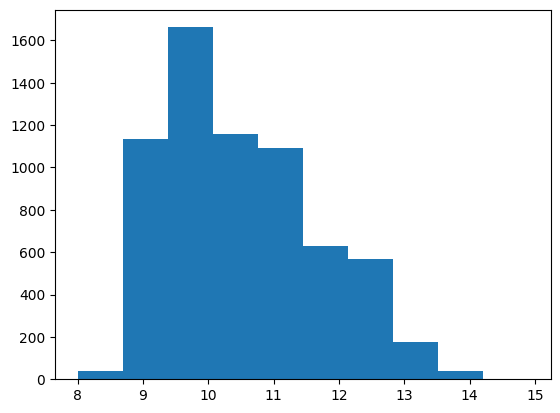

In [ ]:
plt.hist(data)
plt.show()

기본 범주 수는 10개다. 바꿔보자.

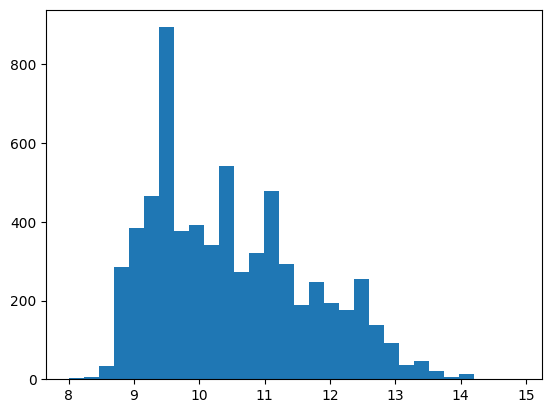

In [ ]:
plt.hist(data, bins=30)
plt.show()

* 퀴즈 : 'wine' 데이터의 '당도(sugar)' 변수에 대해서도 히스토그램을 그려서 분포 모양을 설명해보라. 혹시 적절한 변환방법이 있다면?

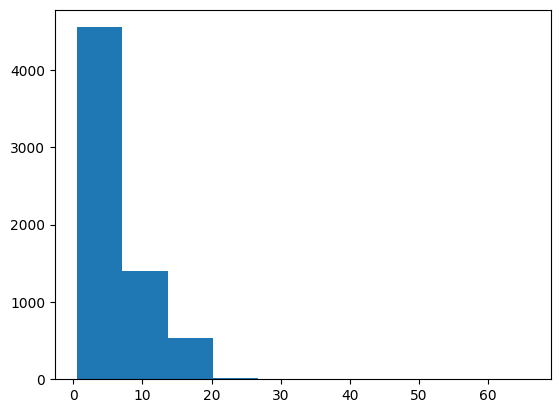

In [ ]:
data = wine['sugar']
plt.hist(data)
plt.show()

In [ ]:
wine.describe()

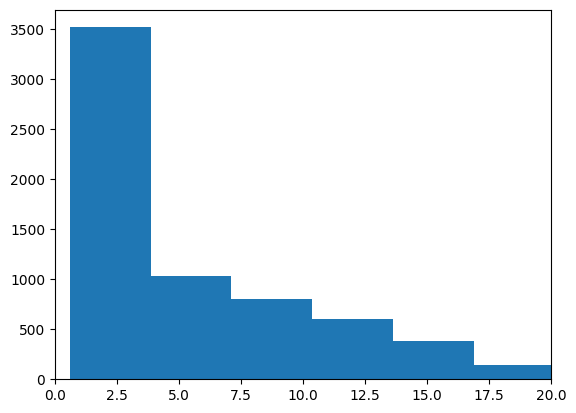

In [ ]:
plt.hist(data, bins =20)
plt.xlim((0, 20))
plt.show()

#### c) 대규모 데이터와 binning

데이터 수가 수만개가 넘는다고 해보자. 즉 각 피처 변수가 수만 개가 넘는 다른 값을 갖는다고 해보자. 트리를 만들려면 피처 변수의 값을 수만 번 비교해서 불순도를 가장 크게 줄일 수 있는 기준을 찾아야한다. 랜덤포레스트든 그래디언트 부스팅이든 수백개의 트리를 만드는데 각 트리의 노드를 분할할 때마다 그런 작업을 반복해야한다.



이럴 때 비교할 값들의 수를 줄이는 방법은? 연속형 분포를 이산형 분포로 바꾸는 것이다. 즉 binning(discretization)을 이용해서 수만개 값을 갖는 연속형 데이터를 훨씬 적은 수의 범주형 데이터로 바꾸고 그 범주를 가지고 노드를 분할하면 되겠다.

#### d) HistGradientBoostingClassifier

길다란 이름을 가진 클래스 `HistGradientBoostingClassifier`는 gradient boosting에 binnig, 즉 연속형 데이터를 이산형 데이터로 바꾸는 방법을 적용한 것이다. `max_bins`의 기본값은 255인데 Na, 즉 누락값을 위한 bin도 만들기 때문에 bin 수는 모두 256개다. 트리의 수를 지정하는 `n_estimators` 대신 최대 반복 수를 뜻하는 `max_iter` 파라미터를 사용한다.

#### e) wine 분류

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(train_input, train_target)

HistGradientBoostingClassifier(random_state=42)

In [ ]:
hgb.score(train_input, train_target)

0.924956705791803

In [ ]:
hgb.score(test_input, test_target)

0.8723076923076923

In [ ]:
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(scores)

{'fit_time': array([0.47600389, 0.49521613, 0.46877742, 0.48106647, 0.3029089 ]), 'score_time': array([0.02088189, 0.01926661, 0.01962018, 0.01942563, 0.01998448]), 'test_score': array([0.87115385, 0.88365385, 0.90279115, 0.86621752, 0.87680462]), 'train_score': array([0.93192206, 0.93216262, 0.92857143, 0.93265993, 0.93554594])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


* 퀴즈 : train 데이터에서 구한 score값 `hgb.score(train_input, train_target)`과 `np.mean(scores['train_score']`의 값이 다른 이유는 무엇인가?

#### e) permutation_importance를 이용한 피처 중요도 평가

교재 273쪽 설명을 읽어보자: "특성 중요도를 계산하기 위한 permutation_importances() 함수는 <u>특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변화하는지 관찰하여 어떤 특성이 중요한지 계산한다.</u>

* 퀴즈 : 이게 대체 무슨 말일까?

  힌트 : 학습 모델에서 중요하지 않은 변수는 그 변수가 있으나 없으나 모델의 성능에 별다른 영향을 주지 않을 것이다. 즉 그 변수에 원래 데이터와 다른 값들이 들어가도 별다른 변화가 없을 것이다.

train data에서 계산한 피처 중요도

In [ ]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

test data에서 계산한 피처 중요도

In [ ]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

### 6) XGBoost, LightGBM

마지막으로 사이킷런 바깥에 있는 부스팅 라이브러리 몇 개를 살펴보자.

`xgboost`와 `lightgbm`이다.

* 엑스트라 그래디언트 부스팅

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

* 라이트 그래디언트부스팅

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))